# Image Filtering with Convolutional Neural Networks

### Load Dependencies

In [44]:
!git clone https://github.com/the-infiltrator/interview.git
import os
os.chdir("/content/interview/ML_Engineer/Img2Img")
!pip install torchviz
from torchviz import make_dot
from model import create_img2img_model, train_model
from utils import apply_filter, preview_filtered_dataset, preview_predictions, load_filtered_dataset, plot_losses, load_filtered_dataset, compute_metrics
import torch
import numpy as np

fatal: destination path 'interview' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Learning a Sobel Filter Kernel

In [21]:
train_dataset, val_dataset = load_filtered_dataset(randomize=False)

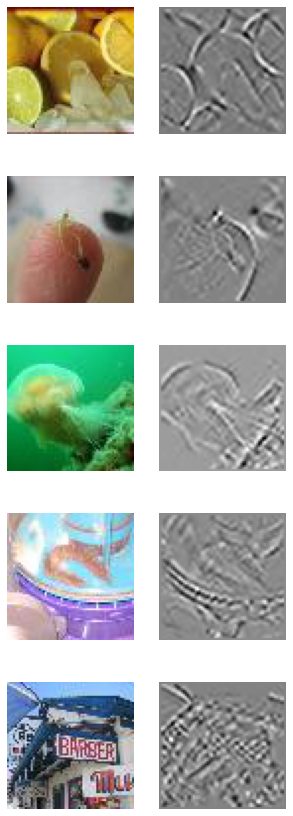

In [ ]:
preview_filtered_dataset(train_dataset)


In [26]:


num_input_channels = 3  # RGB color image
num_output_channels = 1  # Filtered image
model = create_img2img_model(num_input_channels, num_output_channels)



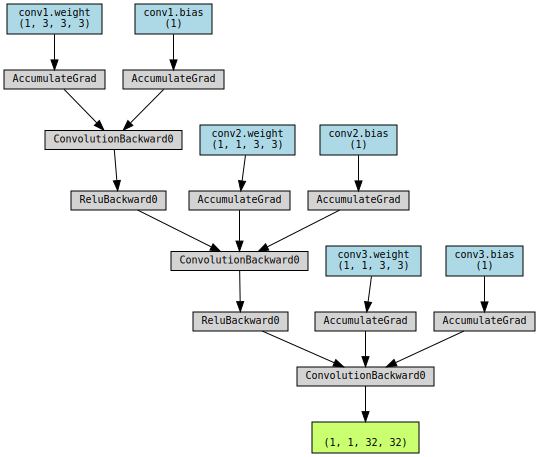

In [17]:

# Use the make_dot function to create a visualization of the model
viz = make_dot(model(torch.zeros(1, 3, 32, 32)), params=dict(model.named_parameters()))

# Save the visualization to a file
viz.render("img2img_network")

viz

In [ ]:

model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

48


In [ ]:
torch.backends.cudnn.benchmark = True
dtype = torch.cuda.FloatTensor

In [ ]:
train_losses, val_losses = train_model(model, 
                                       train_dataset, 
                                       val_dataset, 
                                       max_epochs=50, 
                                       early_stopping_patience=5, 
                                       batch_size=128, 
                                       learning_rate=0.001)

# Save the model with the best validation loss
# torch.save(model.state_dict(), "best_model.pt")

Epoch: 1, Training Loss: 0.0162, Validation Loss: 0.0154
Epoch: 2, Training Loss: 0.0151, Validation Loss: 0.0148
Epoch: 3, Training Loss: 0.0146, Validation Loss: 0.0144
Epoch: 4, Training Loss: 0.0144, Validation Loss: 0.0141
Epoch: 5, Training Loss: 0.0142, Validation Loss: 0.0141
Epoch: 6, Training Loss: 0.0140, Validation Loss: 0.0139
Epoch: 7, Training Loss: 0.0138, Validation Loss: 0.0138
Epoch: 8, Training Loss: 0.0137, Validation Loss: 0.0135
Epoch: 9, Training Loss: 0.0137, Validation Loss: 0.0140
Epoch: 10, Training Loss: 0.0135, Validation Loss: 0.0132
Epoch: 11, Training Loss: 0.0134, Validation Loss: 0.0132
Epoch: 12, Training Loss: 0.0133, Validation Loss: 0.0133
Epoch: 13, Training Loss: 0.0132, Validation Loss: 0.0130
Epoch: 14, Training Loss: 0.0131, Validation Loss: 0.0129
Epoch: 15, Training Loss: 0.0130, Validation Loss: 0.0131
Epoch: 16, Training Loss: 0.0130, Validation Loss: 0.0131
Epoch: 17, Training Loss: 0.0129, Validation Loss: 0.0128
Epoch: 18, Training Los

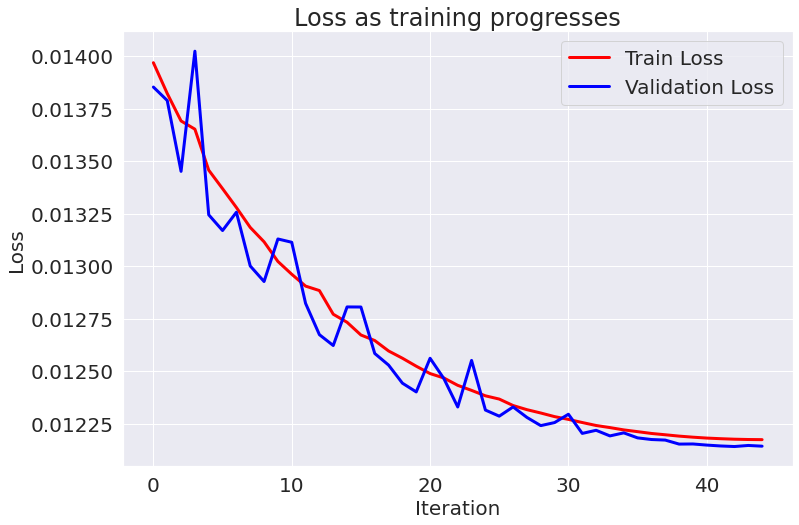

In [ ]:
plot_losses(train_losses, val_losses, save=True,trunc=5) 

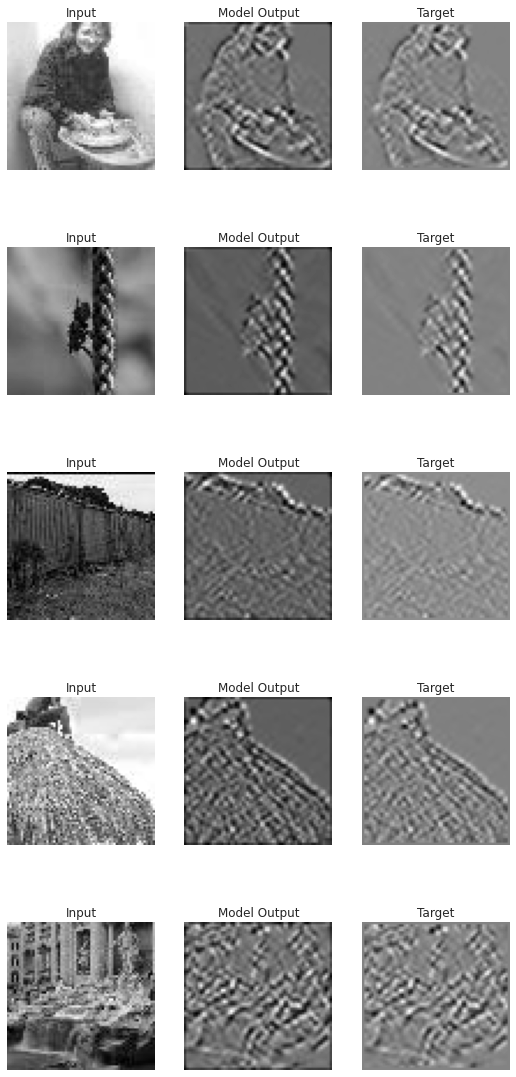

In [ ]:
preview_predictions(model, val_dataset, num_images=5, save_plot=True, plot_save_path="prediction_plot.png")

### Learning Random Filters 

To generalize the img2img algorithm to learn any arbitrary image kernel-based filter, we can make a few changes to the network architecture mentioned below. 

- One approach is to use a fully convolutional network, where all the layers are convolutional and there are no fully connected layers. This allows the network to handle input images of arbitrary size, as the filters are applied in a sliding window fashion across the entire image.

- To allow the network to learn any arbitrary image kernel-based filter, we can increase the number of channels in the convolutional layers. For example, if we want the network to be able to learn a 3x3 kernel-based filter, we can use a convolutional layer with 9 input channels and 1 output channel. The weights of the convolutional layer will correspond to the weights of the filter kernel, and the network can learn to adjust these weights in order to produce the desired output image.

- To test the ability of the network to learn an arbitrary image kernel-based filter, we can randomize the kernel and use it as the target output image for the training data. During training, the network will try to adjust the weights of the convolutional layers to produce an output image that is as close as possible to the target output image.

- One limitation of this approach is that the network may not be able to accurately learn very complex or highly non-linear filters. Additionally, the training process may be slow if the filter kernel is large or the input image is very large, as the network will have to process a large number of pixels. Finally, the network may overfit to the training data if it is not sufficiently regularized, which can limit its generalization ability on new, unseen data.



---


**Due to time constraints, for now let us test our original existing architecture on a random kernel and see how well it performs**

In [ ]:
# Generate training data with random filter applied
train_dataset, val_dataset = load_filtered_dataset(randomize=True)

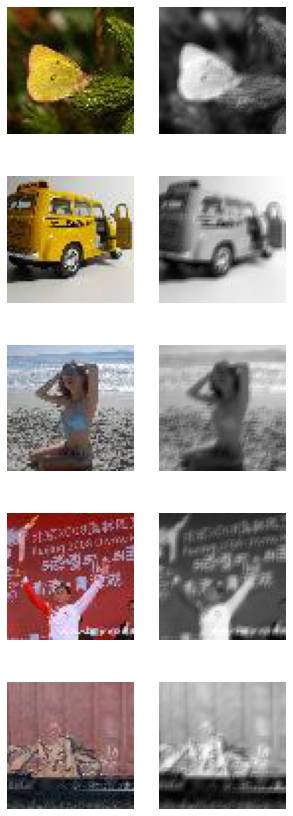

In [ ]:
preview_filtered_dataset(train_dataset)

In [ ]:
num_input_channels = 3  # RGB color image
num_output_channels = 1  # Filtered image
model = create_img2img_model(num_input_channels, num_output_channels)



In [ ]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

48


In [ ]:
train_losses, val_losses = train_model(model, 
                                       train_dataset, 
                                       val_dataset, 
                                       max_epochs=50, 
                                       early_stopping_patience=5, 
                                       batch_size=128, 
                                       learning_rate=0.005)


Epoch: 1, Training Loss: 0.4054, Validation Loss: 0.1246
Epoch: 2, Training Loss: 0.1165, Validation Loss: 0.1130
Epoch: 3, Training Loss: 0.0999, Validation Loss: 0.0904
Epoch: 4, Training Loss: 0.0840, Validation Loss: 0.0724
Epoch: 5, Training Loss: 0.0724, Validation Loss: 0.0633
Epoch: 6, Training Loss: 0.0644, Validation Loss: 0.0670
Epoch: 7, Training Loss: 0.0626, Validation Loss: 0.0611
Epoch: 8, Training Loss: 0.0628, Validation Loss: 0.0595
Epoch: 9, Training Loss: 0.0612, Validation Loss: 0.0602
Epoch: 10, Training Loss: 0.0600, Validation Loss: 0.0544
Epoch: 11, Training Loss: 0.0574, Validation Loss: 0.0589
Epoch: 12, Training Loss: 0.0596, Validation Loss: 0.0577
Epoch: 13, Training Loss: 0.0574, Validation Loss: 0.0536
Epoch: 14, Training Loss: 0.0577, Validation Loss: 0.0570
Epoch: 15, Training Loss: 0.0573, Validation Loss: 0.0576
Epoch: 16, Training Loss: 0.0567, Validation Loss: 0.0560
Epoch: 17, Training Loss: 0.0561, Validation Loss: 0.0562
Epoch: 18, Training Los

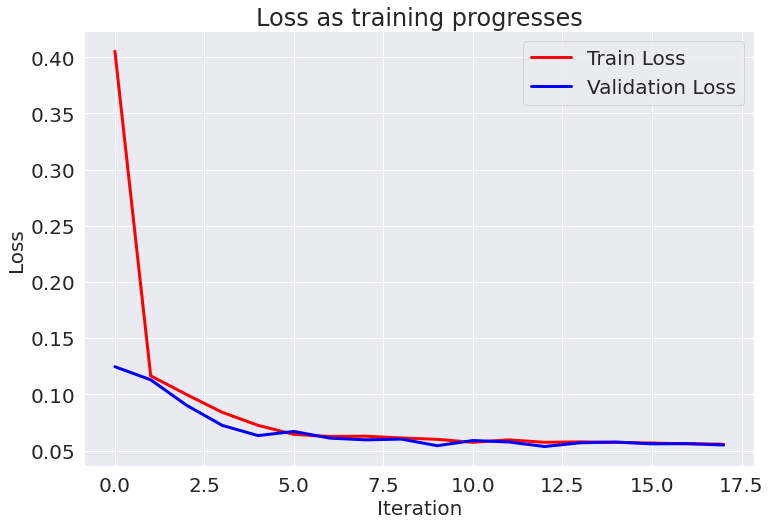

In [ ]:
plot_losses(train_losses, val_losses, save=True)

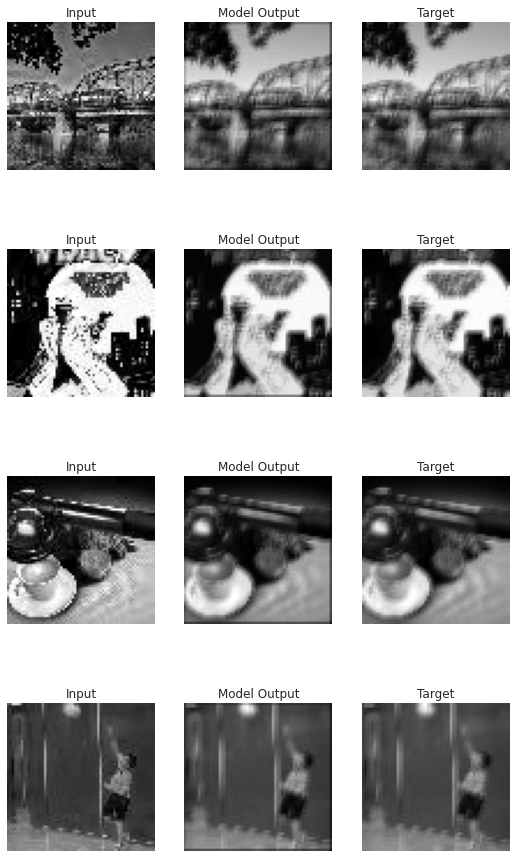

In [ ]:
preview_predictions(model, val_dataset, num_images=4, save_plot=True, plot_save_path="prediction_plot.png")